In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df=pd.read_csv("Train.csv")
df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Food,Fruits and Vegetables,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,0,0,0,0,1,0,0,...,0,0,0,0,249.8092,1999,2.0,1,1,3735.1380
1,5.92,1,0.019278,0,0,0,0,0,0,0,...,0,0,1,0,48.2692,2009,2.0,3,2,443.4228
2,17.50,0,0.016760,0,0,0,0,0,0,0,...,0,0,0,0,141.6180,1999,2.0,1,1,2097.2700


Exploratory Data Analysis

In [24]:
df.shape

(8523, 25)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Baking Goods               8523 non-null   int64  
 4   Breads                     8523 non-null   int64  
 5   Breakfast                  8523 non-null   int64  
 6   Canned                     8523 non-null   int64  
 7   Dairy                      8523 non-null   int64  
 8   Frozen Food                8523 non-null   int64  
 9   Fruits and Vegetables      8523 non-null   int64  
 10  Hard Drinks                8523 non-null   int64  
 11  Health and Hygiene         8523 non-null   int64  
 12  Household                  8523 non-null   int64  
 13  Meat                       8523 non-null   int64

In [26]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Baking Goods                    0
Breads                          0
Breakfast                       0
Canned                          0
Dairy                           0
Frozen Food                     0
Fruits and Vegetables           0
Hard Drinks                     0
Health and Hygiene              0
Household                       0
Meat                            0
Others                          0
Seafood                         0
Snack Foods                     0
Soft Drinks                     0
Starchy Foods                   0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have missing values in 2 columns
*Item_Weight
*Outket_Size

In [27]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Food,Fruits and Vegetables,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.023238,-0.014048,-0.035838,-0.056124,-0.002177,-0.034176,0.036142,0.000682,0.032474,...,-0.005600,0.011314,-0.051457,0.024574,0.027141,-0.011588,-0.011948,0.004715,-0.001088,0.014123
Item_Fat_Content,-0.023238,1.000000,0.047314,0.083804,0.032643,0.065711,0.073235,0.021236,0.085041,0.116955,...,0.012594,0.059848,-0.094875,0.025945,0.006063,0.003151,-0.000979,-0.001598,0.002199,0.018719
Item_Visibility,-0.014048,0.047314,1.000000,0.016887,0.000416,0.043418,0.011114,0.035984,-0.003153,0.018969,...,0.014910,0.005635,-0.009825,0.003688,-0.001315,-0.074834,0.096773,-0.028099,-0.173468,-0.128625
Baking Goods,-0.035838,0.083804,0.016887,1.000000,-0.049968,-0.032801,-0.082354,-0.084600,-0.095849,-0.117916,...,-0.024951,-0.116120,-0.067327,-0.038133,-0.067311,-0.003546,0.003300,-0.003345,-0.005220,-0.038381
Breads,-0.056124,0.032643,0.000416,-0.049968,1.000000,-0.019918,-0.050010,-0.051373,-0.058204,-0.071605,...,-0.015152,-0.070514,-0.040885,-0.023156,-0.000112,-0.003631,0.004683,0.003987,0.004787,0.002332
Breakfast,-0.002177,0.065711,0.043418,-0.032801,-0.019918,1.000000,-0.032828,-0.033723,-0.038207,-0.047004,...,-0.009946,-0.046288,-0.026838,-0.015201,0.001460,-0.006768,-0.003772,-0.000532,-0.009312,-0.004656
Canned,-0.034176,0.073235,0.011114,-0.082354,-0.050010,-0.032828,1.000000,-0.084670,-0.095929,-0.118015,...,-0.024972,-0.116217,-0.067383,-0.038165,-0.005666,0.010998,0.010394,-0.000138,0.010225,0.007387
Dairy,0.036142,0.021236,0.035984,-0.084600,-0.051373,-0.033723,-0.084670,1.000000,-0.098544,-0.121232,...,-0.025653,-0.119386,-0.069220,-0.039205,0.035551,-0.005286,-0.000118,-0.010098,-0.012072,0.008858
Frozen Food,0.000682,0.085041,-0.003153,-0.095849,-0.058204,-0.038207,-0.095929,-0.098544,1.000000,-0.137352,...,-0.029064,-0.135260,-0.078425,-0.044418,-0.013358,0.007690,0.008202,-0.009422,-0.002571,-0.009482
Fruits and Vegetables,0.032474,0.116955,0.018969,-0.117916,-0.071605,-0.047004,-0.118015,-0.121232,-0.137352,1.000000,...,-0.035755,-0.166402,-0.096481,-0.054645,0.023688,-0.005495,-0.016223,0.008188,0.006325,0.025950


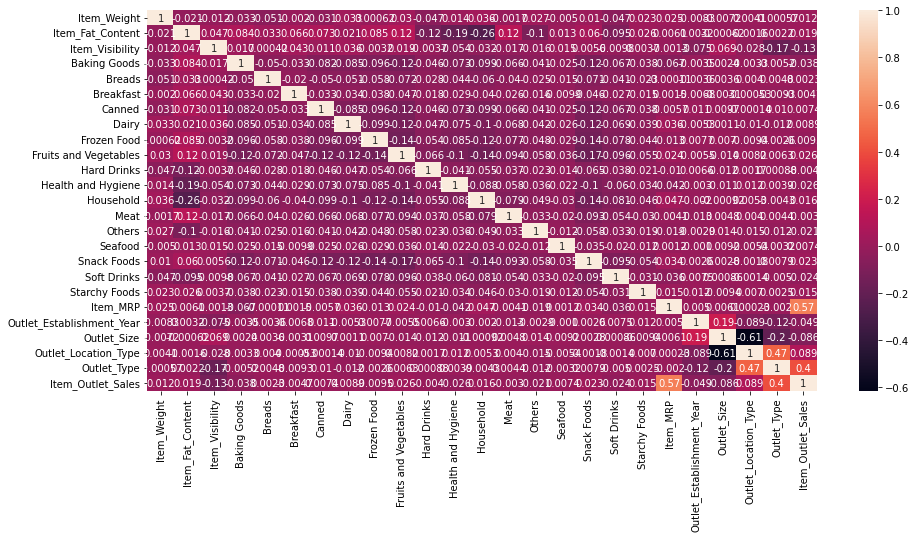

In [48]:
#Understanding correlation
fig=plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

Data Cleaning

In [29]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Baking Goods                    0
Breads                          0
Breakfast                       0
Canned                          0
Dairy                           0
Frozen Food                     0
Fruits and Vegetables           0
Hard Drinks                     0
Health and Hygiene              0
Household                       0
Meat                            0
Others                          0
Seafood                         0
Snack Foods                     0
Soft Drinks                     0
Starchy Foods                   0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [31]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Baking Goods                    0
Breads                          0
Breakfast                       0
Canned                          0
Dairy                           0
Frozen Food                     0
Fruits and Vegetables           0
Hard Drinks                     0
Health and Hygiene              0
Household                       0
Meat                            0
Others                          0
Seafood                         0
Snack Foods                     0
Soft Drinks                     0
Starchy Foods                   0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
df['Outlet_Size'].unique()

array([ 2., nan,  1.,  3.])

In [33]:
df['Outlet_Size'].value_counts()

2.0    2793
3.0    2388
1.0     932
Name: Outlet_Size, dtype: int64

In [34]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [35]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Baking Goods                 0
Breads                       0
Breakfast                    0
Canned                       0
Dairy                        0
Frozen Food                  0
Fruits and Vegetables        0
Hard Drinks                  0
Health and Hygiene           0
Household                    0
Meat                         0
Others                       0
Seafood                      0
Snack Foods                  0
Soft Drinks                  0
Starchy Foods                0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Checking for Categorical Features

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Baking Goods               8523 non-null   int64  
 4   Breads                     8523 non-null   int64  
 5   Breakfast                  8523 non-null   int64  
 6   Canned                     8523 non-null   int64  
 7   Dairy                      8523 non-null   int64  
 8   Frozen Food                8523 non-null   int64  
 9   Fruits and Vegetables      8523 non-null   int64  
 10  Hard Drinks                8523 non-null   int64  
 11  Health and Hygiene         8523 non-null   int64  
 12  Household                  8523 non-null   int64  
 13  Meat                       8523 non-null   int64

In [37]:
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [38]:
df['Outlet_Size'].value_counts()

2.0    5203
3.0    2388
1.0     932
Name: Outlet_Size, dtype: int64

In [39]:
df['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

Now there is no formatting mistakes in any feature of our Dataset

In [40]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Baking Goods               8523 non-null   int64  
 4   Breads                     8523 non-null   int64  
 5   Breakfast                  8523 non-null   int64  
 6   Canned                     8523 non-null   int64  
 7   Dairy                      8523 non-null   int64  
 8   Frozen Food                8523 non-null   int64  
 9   Fruits and Vegetables      8523 non-null   int64  
 10  Hard Drinks                8523 non-null   int64  
 11  Health and Hygiene         8523 non-null   int64  
 12  Household                  8523 non-null   int64  
 13  Meat                       8523 non-null   int64

(8523, 25)

Machine Learning works only on Numerical Data. However there is categorical data as well in our dataset. So we need to change that into Numeric form. For that we will use Ordinal Encoding.

In [41]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 872 kB/s 


In [42]:
df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Food,Fruits and Vegetables,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,0,0,0,0,1,0,0,...,0,0,0,0,249.8092,1999,2.0,1,1,3735.1380
1,5.92,1,0.019278,0,0,0,0,0,0,0,...,0,0,1,0,48.2692,2009,2.0,3,2,443.4228
2,17.50,0,0.016760,0,0,0,0,0,0,0,...,0,0,0,0,141.6180,1999,2.0,1,1,2097.2700


In [43]:
df.shape

(8523, 25)

In [44]:
import category_encoders as ce

In [46]:
x = df.drop('Item_Outlet_Sales',axis=1)
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Food,Fruits and Vegetables,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,0,0,0,0,1,0,0,...,0,0,0,0,0,249.8092,1999,2.0,1,1
1,5.92,1,0.019278,0,0,0,0,0,0,0,...,0,0,0,1,0,48.2692,2009,2.0,3,2
2,17.50,0,0.016760,0,0,0,0,0,0,0,...,0,0,0,0,0,141.6180,1999,2.0,1,1
3,19.20,1,0.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,182.0950,1998,2.0,3,0
4,8.93,0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,53.8614,1987,1.0,3,1


In [47]:
x.shape

(8523, 24)

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [49]:
y=df['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Now we will Import X_Train Tesgt Split

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.33, random_state=42)

In [51]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Food,Fruits and Vegetables,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3288,12.857645,0,0.031187,0,0,0,0,0,0,0,...,1,0,0,0,0,39.5480,1985,2.0,3,3
2206,12.650000,1,0.076199,0,0,0,0,0,1,0,...,0,0,0,0,0,191.3846,2002,2.0,2,1
170,14.500000,0,0.019472,0,0,0,0,0,0,0,...,1,0,0,0,0,164.8210,2004,3.0,2,1
6526,12.857645,1,0.057762,0,0,0,0,0,0,1,...,0,0,0,0,0,237.3564,1985,2.0,3,3
135,7.235000,0,0.076856,0,0,0,0,0,0,0,...,0,0,0,0,0,116.0492,1997,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395000,1,0.286345,0,0,0,0,0,0,1,...,0,0,0,0,0,139.1838,1998,2.0,3,0
5191,15.600000,0,0.117575,0,0,0,0,0,1,0,...,0,0,0,0,0,75.6670,2007,2.0,2,1
5390,17.600000,0,0.018944,0,0,0,0,0,0,0,...,0,0,0,0,0,237.3590,2002,2.0,2,1
860,20.350000,0,0.054363,0,0,0,0,0,0,0,...,0,0,1,0,0,117.9466,2007,2.0,2,1


In [52]:
y_train

3288     759.0120
2206    2675.1844
170     2120.5730
6526    2145.2076
135     1969.4364
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 5710, dtype: float64

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
norm = MinMaxScaler().fit(x_train)

#transform training data
x_train_norm=norm.transform(x_train)

In [57]:
x_train.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Food,Fruits and Vegetables,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3288,12.857645,0,0.031187,0,0,0,0,0,0,0,...,1,0,0,0,0,39.5480,1985,2.0,3,3
2206,12.650000,1,0.076199,0,0,0,0,0,1,0,...,0,0,0,0,0,191.3846,2002,2.0,2,1
170,14.500000,0,0.019472,0,0,0,0,0,0,0,...,1,0,0,0,0,164.8210,2004,3.0,2,1


In [58]:
print(x_train_norm)

[[0.4943522  0.         0.09496851 ... 0.5        1.         1.        ]
 [0.48198869 1.         0.23203687 ... 0.5        0.5        0.33333333]
 [0.59214052 0.         0.05929423 ... 1.         0.5        0.33333333]
 ...
 [0.77671926 0.         0.05768632 ... 0.5        0.5        0.33333333]
 [0.94045847 0.         0.16554261 ... 0.5        0.5        0.33333333]
 [0.70229235 0.         0.05174687 ... 1.         0.         0.33333333]]


In [60]:
scaled_features_df = pd.DataFrame(x_train_norm,index=x_train.index,columns=x_train.columns)

In [61]:
scaled_features_df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Food,Fruits and Vegetables,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3288,0.494352,0.0,0.094969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.035051,0.000000,0.5,1.0,1.000000
2206,0.481989,1.0,0.232037,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.679523,0.708333,0.5,0.5,0.333333
170,0.592141,0.0,0.059294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.566774,0.791667,1.0,0.5,0.333333


In [62]:
scaled_features_df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Food,Fruits and Vegetables,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.00000,5710.000000,5710.000000,...,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000
mean,0.498693,0.350613,0.199803,0.072329,0.026620,0.013310,0.075306,0.07986,0.098774,0.149912,...,0.020315,0.006655,0.139755,0.051138,0.019615,0.469522,0.535398,0.585377,0.561033,0.403503
std,0.251233,0.477204,0.155285,0.259055,0.160984,0.114609,0.263908,0.27110,0.298385,0.357017,...,0.141089,0.081313,0.346763,0.220299,0.138684,0.266125,0.349607,0.300385,0.405121,0.266565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294433,0.000000,0.082066,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.266783,0.083333,0.500000,0.000000,0.333333
50%,0.494352,0.000000,0.163161,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.477889,0.583333,0.500000,0.500000,0.333333
75%,0.687407,1.000000,0.286557,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.660129,0.791667,1.000000,1.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
x_train = scaled_features_df

In [64]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Food,Fruits and Vegetables,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3288,0.494352,0.0,0.094969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.035051,0.000000,0.5,1.0,1.000000
2206,0.481989,1.0,0.232037,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.679523,0.708333,0.5,0.5,0.333333
170,0.592141,0.0,0.059294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.566774,0.791667,1.0,0.5,0.333333
6526,0.494352,1.0,0.175895,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.874651,0.000000,0.5,1.0,1.000000
135,0.159571,0.0,0.234037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.359761,0.500000,1.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.288181,1.0,0.871963,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.457956,0.541667,0.5,1.0,0.000000
5191,0.657636,0.0,0.358032,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.188359,0.916667,0.5,0.5,0.333333
5390,0.776719,0.0,0.057686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.874662,0.708333,0.5,0.5,0.333333
860,0.940458,0.0,0.165543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.367815,0.916667,0.5,0.5,0.333333


Now we will do Scale X_Test

In [65]:
norm = MinMaxScaler().fit(x_test)

#transform testing data
x_test_norm = norm.transform(x_test)

In [66]:
x_test_norm

array([[0.57935561, 0.        , 0.08190149, ..., 0.        , 1.        ,
        0.33333333],
       [0.19928401, 0.        , 0.2215277 , ..., 1.        , 0.        ,
        0.33333333],
       [0.59128878, 1.        , 0.12865547, ..., 0.5       , 0.        ,
        0.33333333],
       ...,
       [0.07130072, 1.        , 0.12639442, ..., 0.5       , 0.5       ,
        0.33333333],
       [0.01968974, 0.        , 0.14311082, ..., 1.        , 0.        ,
        0.33333333],
       [0.56145585, 1.        , 0.42454818, ..., 0.5       , 1.        ,
        0.66666667]])

Here We are done with the Scaling of both X_train and X_test

Now we will continue with the Modeling Part

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
reg = LinearRegression().fit(x_train,y_train)

In [69]:
y_pred = reg.predict(x_test)

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mean_squared_error(y_test,y_pred, squared=False)

635943.5986709163

In [74]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR()

In [83]:
y_pred=regressor.predict(x_test)

In [84]:
mean_squared_error(y_test,y_pred, squared=False)

1703.4833004848708